In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("./data/set_b.csv")
df.head()

,dataset,fname,label,sublabel
0,b,set_b/Btraining_extrastole_127_1306764300147_C...,extrastole,NaN
1,b,set_b/Btraining_extrastole_128_1306344005749_A...,extrastole,NaN
2,b,set_b/Btraining_extrastole_130_1306347376079_D...,extrastole,NaN
3,b,set_b/Btraining_extrastole_134_1306428161797_C...,extrastole,NaN
4,b,set_b/Btraining_extrastole_138_1306762146980_B...,extrastole,NaN


In [2]:
df.shape

(656, 4)

In [3]:
df.describe()

,dataset,fname,label,sublabel
count,656,656,461,149
unique,1,656,3,2
top,b,set_b/Btraining_normal_145_1307987561278_B.wav,normal,noisynormal
freq,656,1,320,120


In [4]:
df.label.unique()

array(['extrastole', 'murmur', 'normal', nan], dtype=object)

In [5]:
df = df[pd.notnull(df["label"])]

df.shape

(461, 4)

In [6]:
df.label.unique()

array(['extrastole', 'murmur', 'normal'], dtype=object)

In [7]:
for i, _ in df.iterrows():
    path = df.ix[i, "fname"]
    path = path.replace("Btraining_", "")
    
    first_ind = path.find(df.ix[i, "label"])
    
    path = "./data/wav/" + path[first_ind:]
    
    if pd.isnull(df.ix[i, "sublabel"]):
        final_ind = path.find("_")

        path = path[:final_ind] + "_" + path[final_ind:]

    df.ix[i, "fname"] = path

In [8]:
df.head()

,dataset,fname,label,sublabel
0,b,./data/wav/extrastole__127_1306764300147_C2.wav,extrastole,NaN
1,b,./data/wav/extrastole__128_1306344005749_A.wav,extrastole,NaN
2,b,./data/wav/extrastole__130_1306347376079_D.wav,extrastole,NaN
3,b,./data/wav/extrastole__134_1306428161797_C1.wav,extrastole,NaN
4,b,./data/wav/extrastole__138_1306762146980_B.wav,extrastole,NaN


In [9]:
from scipy.io import wavfile

def graph_spectrogram(wav_file, save_png=False):
    _, data = get_wav_info(wav_file)
    window = 256
    samp_freq = 256
    plt.specgram(data, window, samp_freq)
    
    if save_png:
        plt.axis("off")
        plt.specgram(data, window, samp_freq)
        plt.savefig(wav_file.replace("wav", "png"),
                    dpi=100, # Dots per inch
                    frameon=False,
                    aspect="normal",
                    bbox_inches="tight",
                    pad_inches=0) # Spectrogram saved as a .png
        plt.close("all")

def get_wav_info(wav_file):
    rate, data = wavfile.read(wav_file)
    return rate, data

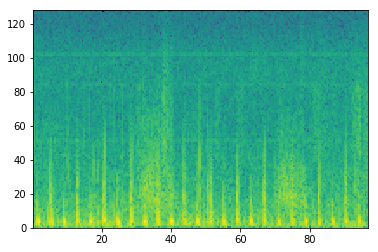

In [10]:
import IPython
from matplotlib import pyplot as plt
%matplotlib inline

ind = df[df.label == "normal"].first_valid_index()
graph_spectrogram(df.ix[ind, "fname"])


IPython.display.Audio(df.ix[ind, "fname"])

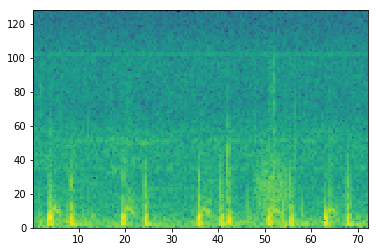

In [11]:
ind = df[df.label == "murmur"].first_valid_index()
graph_spectrogram(df.ix[ind, "fname"])


IPython.display.Audio(df.ix[ind, "fname"])

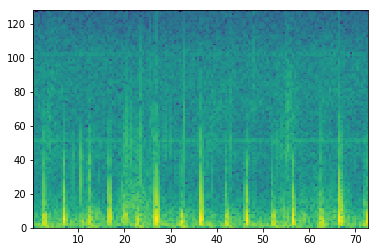

In [12]:
ind = df[df.label == "extrastole"].first_valid_index()
graph_spectrogram(df.ix[ind, "fname"])


IPython.display.Audio(df.ix[ind, "fname"])

In [13]:
from PIL import Image

graph_spectrogram(df.ix[ind, "fname"], True)

Image.open(df.ix[ind, "fname"].replace("wav", "png")).size

(504, 329)

In [14]:
from PIL import ImageChops

def trim(im):
    bg = Image.new(im.mode, im.size, im.getpixel((0,0)))
    diff = ImageChops.difference(im, bg)
    diff = ImageChops.add(diff, diff, 2.0, -100)
    bbox = diff.getbbox()
    
    if bbox:
        return im.crop(bbox)

In [15]:
im = Image.open(df.ix[0, "fname"].replace("wav", "png"))
im = trim(im)
im.save(df.ix[0, "fname"].replace("wav", "png"))

Image.open(df.ix[ind, "fname"].replace("wav", "png")).size

(465, 302)

In [16]:
df.ix[509, :].fname

'./data/wav/murmur_noisymurmur_135_1306428972976_C.wav'

In [17]:
print(df.ix[509, "fname"])

./data/wav/murmur_noisymurmur_135_1306428972976_C.wav


In [18]:
import time

global_size = (465, 302)

for i, _ in df.iterrows():
    path = df.ix[i, "fname"].replace("wav", "png")
    df.ix[i, "iname"] = path
#     graph_spectrogram(df.ix[i, "fname"], True)
    
#     im = trim(Image.open(path))
#     im.save(path)

#     if im.size != global_size:
#         print(i, im.size, global_size)
    
#     time.sleep(0.05)

df.head()

,dataset,fname,label,sublabel,iname
0,b,./data/wav/extrastole__127_1306764300147_C2.wav,extrastole,NaN,./data/png/extrastole__127_1306764300147_C2.png
1,b,./data/wav/extrastole__128_1306344005749_A.wav,extrastole,NaN,./data/png/extrastole__128_1306344005749_A.png
2,b,./data/wav/extrastole__130_1306347376079_D.wav,extrastole,NaN,./data/png/extrastole__130_1306347376079_D.png
3,b,./data/wav/extrastole__134_1306428161797_C1.wav,extrastole,NaN,./data/png/extrastole__134_1306428161797_C1.png
4,b,./data/wav/extrastole__138_1306762146980_B.wav,extrastole,NaN,./data/png/extrastole__138_1306762146980_B.png


In [19]:
map = {
    "normal": 0,
    "murmur": 1
}

o_df = df

df = pd.DataFrame()
df["image"] = o_df["iname"]
df["label"]  = o_df["label"]

df.head()

,image,label
0,./data/png/extrastole__127_1306764300147_C2.png,extrastole
1,./data/png/extrastole__128_1306344005749_A.png,extrastole
2,./data/png/extrastole__130_1306347376079_D.png,extrastole
3,./data/png/extrastole__134_1306428161797_C1.png,extrastole
4,./data/png/extrastole__138_1306762146980_B.png,extrastole


In [20]:
df = df[df.label != "extrastole"]

for i, _ in df.iterrows():
    df.ix[i, "label"] = map[df.ix[i, "label"]]

df.head()

,image,label
46,./data/png/murmur__112_1306243000964_A.png,1
47,./data/png/murmur__112_1306243000964_B.png,1
48,./data/png/murmur__112_1306243000964_D.png,1
49,./data/png/murmur__116_1306258689913_A.png,1
50,./data/png/murmur__116_1306258689913_C.png,1


In [21]:
from keras.preprocessing.image import array_to_img, img_to_array, load_img

X = np.array([])
Y = np.array([])

for _, row in df.iterrows():
    img = load_img(row.image)
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)
    
    if X.size == 0:
        X = x
    else:
        X = np.vstack([X, x])

    y = np.asarray([row.label])
    y.reshape((1,) + y.shape)

    if Y.size == 0:
        Y = y
    else:
        Y = np.vstack([Y, y])
        
    print(X.shape, Y.shape)

Using TensorFlow backend.


(1, 302, 465, 3) (1,)
(2, 302, 465, 3) (2, 1)
(3, 302, 465, 3) (3, 1)
(4, 302, 465, 3) (4, 1)
(5, 302, 465, 3) (5, 1)
(6, 302, 465, 3) (6, 1)
(7, 302, 465, 3) (7, 1)
(8, 302, 465, 3) (8, 1)
(9, 302, 465, 3) (9, 1)
(10, 302, 465, 3) (10, 1)
(11, 302, 465, 3) (11, 1)
(12, 302, 465, 3) (12, 1)
(13, 302, 465, 3) (13, 1)
(14, 302, 465, 3) (14, 1)
(15, 302, 465, 3) (15, 1)
(16, 302, 465, 3) (16, 1)
(17, 302, 465, 3) (17, 1)
(18, 302, 465, 3) (18, 1)
(19, 302, 465, 3) (19, 1)
(20, 302, 465, 3) (20, 1)
(21, 302, 465, 3) (21, 1)
(22, 302, 465, 3) (22, 1)
(23, 302, 465, 3) (23, 1)
(24, 302, 465, 3) (24, 1)
(25, 302, 465, 3) (25, 1)
(26, 302, 465, 3) (26, 1)
(27, 302, 465, 3) (27, 1)
(28, 302, 465, 3) (28, 1)
(29, 302, 465, 3) (29, 1)
(30, 302, 465, 3) (30, 1)
(31, 302, 465, 3) (31, 1)
(32, 302, 465, 3) (32, 1)
(33, 302, 465, 3) (33, 1)
(34, 302, 465, 3) (34, 1)
(35, 302, 465, 3) (35, 1)
(36, 302, 465, 3) (36, 1)
(37, 302, 465, 3) (37, 1)
(38, 302, 465, 3) (38, 1)
(39, 302, 465, 3) (39, 1)
(40, 3

In [22]:
from keras.utils import to_categorical

Y = to_categorical(Y)

In [23]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras.layers.convolutional import Convolution2D
from keras.layers.pooling import MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.optimizers import SGD

## AlexNet

# model = Sequential()

# model.add(Convolution2D(64, (3, 3), input_shape=(302, 465, 3)))
# model.add(BatchNormalization())
# model.add(Activation("relu"))
# model.add(MaxPooling2D(pool_size=(3, 3)))

# model.add(Convolution2D(128, (3, 3)))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(3, 3)))

# model.add(Convolution2D(192, (6, 6)))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(3, 3)))

# model.add(Flatten())
# model.add(Dense(4096, kernel_initializer='normal'))
# model.add(BatchNormalization())
# model.add(Activation('relu'))
# model.add(Dense(1000, kernel_initializer='normal'))
# model.add(BatchNormalization())
# model.add(Activation('softmax'))

model = Sequential([
    Convolution2D(62, (3, 3), input_shape=(302, 465, 3)),
    BatchNormalization(),
    Activation("relu"),
    MaxPooling2D((3, 3)),
    Flatten(),
    Dense(2265, kernel_initializer="normal"),
    BatchNormalization(),
    Activation("relu"),
    Dense(2, kernel_initializer="normal"),
    BatchNormalization(),
    Activation("softmax")
])

model.compile(loss="categorical_crossentropy", optimizer=SGD(lr=0.01, momentum=0.9, nesterov=True), metrics=["accuracy"])

In [ ]:
model.output_shape

(None, 2)

In [ ]:
model.fit(X, Y, epochs=100, shuffle=True, validation_split=0.2)

Train on 332 samples, validate on 83 samples
Epoch 1/100
